### Fig.1

In [1]:
import matplotlib.pyplot as plt 
from matplotlib import font_manager 
font_path = "/mnt/cyy14/data_qg/old_draw/font"
font_files = font_manager.findSystemFonts(fontpaths=font_path)
for file in font_files:
    font_manager.fontManager.addfont(file)
plt.rcParams["font.sans-serif"] = "Arial"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
sys.path.append('/home/caoyuyao/dataset_14T/UID-Moji/src')
from visualization import ObservationMap
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec

plt.rcParams["font.sans-serif"] = "Arial"

In [ ]:
pressure_station_loc_dict = np.load('/mnt/cyy14/Thesis/data/Work2/station_information/2019010100-2019123123_pressure_station_loc_dict.npy', allow_pickle = 'True').item()
pressure_station_record_count_dict = np.load('/mnt/cyy14/Thesis/data/Work2/station_information/2019010100-2019123123_pressure_station_record_count_dict.npy', allow_pickle = 'True').item()

lon_list = []
lat_list = []

good_lon_list = []
good_lat_list = []
for key in pressure_station_loc_dict:
    loc_set = pressure_station_loc_dict[key]
    new_loc_set = set()
    for i in range(len(loc_set)):
        lon, lat = loc_set.pop()

        lon = round(lon, 3)
        lat = round(lat, 3)
        new_loc_set.add((lon, lat))
        
    if len(new_loc_set) > 1:
        continue
    try:
        lon, lat = new_loc_set.pop()
        lon_list.append(lon)
        lat_list.append(lat)

        if pressure_station_record_count_dict[key] >= 0.8*365*24:
            good_lon_list.append(lon)
            good_lat_list.append(lat)
    except KeyError:
        continue

print(len(lon_list))

11585


In [ ]:
# v4.1 
lon_=[]
lat_=[]
for i in range(len(lon_list)):
    if (lon_list[i]>95 or lat_list[i]>25) and\
       (lat_list[i]>46.8 or lat_list[i]<45.8 or lon_list[i]>115.7 or lon_list[i]<114.7) :
        lon_.append(lon_list[i])
        lat_.append(lat_list[i])
lon_list=lon_
lat_list=lat_

In [ ]:
# v4.0
def plot_2019(lat_0=30, lon_0=105, width=6E6, height=7E6):
    obs_map = ObservationMap(llon = 72, rlon = 136, llat = 3, ulat = 55)
    obs_map.set_map(province_boundary_color = 'dimgray', province = True, coastline = False, south_China_sea =False, grid=True,\
                    tick_label_size=12, lat_ticks=range(10,60,10), lon_ticks=range(70,150,10), projection='lcc',\
                    lat_0=lat_0, lat_1=25, lat_2=47, lon_0=lon_0, width=width, height=height, lock_aspect=True)
    obs_map.scatter(lons = lon_list, lats = lat_list, color = 'royalblue', marker = 'o', marker_size = 0.1)
    return obs_map

"\ndef plot_2020_2021(lon_list, lat_list):\n    obs_map = ObservationMap(llon = 70, rlon = 140, llat = 15, ulat = 55)\n    obs_map.set_map(province = False, coastline = False, south_China_sea = True)\n    obs_map.scatter(lons = lon_list, lats = lat_list, color = 'royalblue', marker = '+', marker_size = 0.5)\n"

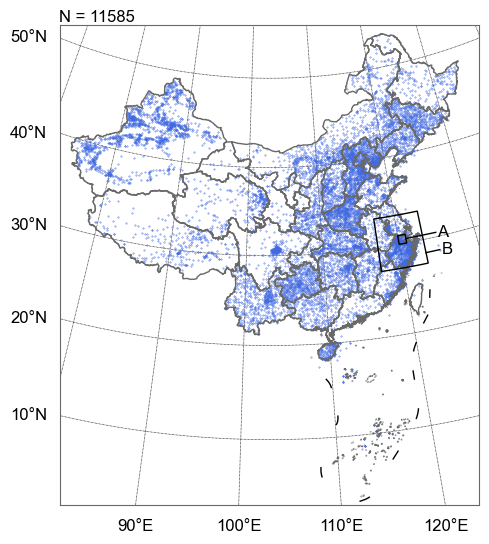

In [ ]:
fig = plt.figure(1)
#ax=fig.add_subplot(1,1,1)
#fig.set_size_inches(5, 4)
fig.set_size_inches(6, 6)
x0=0.7
y0=0.8
ax=plt.axes([0.5-x0/2, 0.5-y0/2, x0, y0])
plt.sca(ax)

map_lkm=plot_2019(lat_0=29, lon_0=103, width=5.2E6, height=5.95E6)
map_lkm.add_rectangle_MapAttached(lon_list=[117.2, 123.2], lat_list=[27.3, 33.3], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
map_lkm.add_rectangle_MapAttached(lon_list=[120, 121], lat_list=[30, 31], facecolor = 'none', edgecolor = 'black', linewidth = 1, zorder = 99999)
map_lkm.plot(lons=[121,125], lats=[30.5,30.5], linewidth = 1, color = 'black', zorder = 99999)
map_lkm.plot(lons=[123.2,125], lats=[28.5,28.5], linewidth = 1, color = 'black', zorder = 99999)
map_lkm.text(x=125.2, y=30.5, s='A', ha='left',va='center')
map_lkm.text(x=125.2, y=28.5, s='B', ha='left',va='center')

fig.text(0.5-x0/2, 0.5+y0/2, s = 'N = 11585', fontsize=12, verticalalignment="bottom", horizontalalignment="left")

ax.spines['right'].set_color('dimgrey')
ax.spines['left'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.tick_params(axis = 'both', length=0, labelcolor='dimgrey')

fig_dir = '/mnt/cyy14/data_qg/old_draw/submit/'
plt.savefig(fig_dir + 'f01.pdf', dpi = 300, format='pdf', bbox_inches = 'tight')